In [1]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from langdetect import detect
from googletrans import Translator

In [2]:
dataset = pd.read_csv('cleanData.csv')

In [3]:
dataset.head()

,app,category,rating,reviews,size,installs,price,rated,lastUpdated,osVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,0.0,Everyone,2018-01-07,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,0.0,Everyone,2018-01-15,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,0.0,Everyone,2018-08-01,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,0.0,Teen,2018-06-08,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,0.0,Everyone,2018-06-20,4.4 and up


In [4]:
groupedData = dataset.groupby('rating')

In [5]:
groupedData.get_group(1)['rating'].count()

16

In [6]:
bins = pd.cut(dataset['rating'], [1, 2, 3, 4, 5])
dataset_Rating = dataset.groupby(bins)['rating'].agg(['count'])
dataset_Rating['count']

rating
(1, 2]      50
(2, 3]     294
(3, 4]    2063
(4, 5]    5773
Name: count, dtype: int64

In [7]:
categorizedData = dataset.groupby('category')

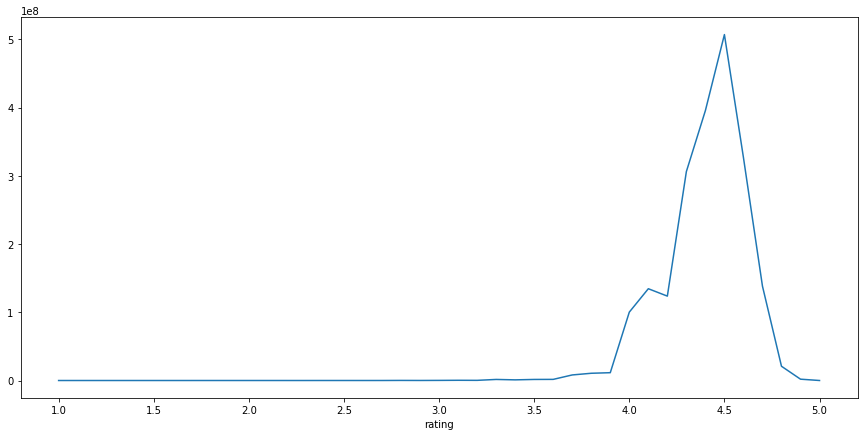

In [8]:
fig, ax = plt.subplots(figsize=(15,7))
ax.set_facecolor('white')
dataset.groupby(['rating']).sum()['reviews'].plot(ax=ax)

In [354]:
# dataset.groupby('rated').case_status.value_counts().plot.barh()

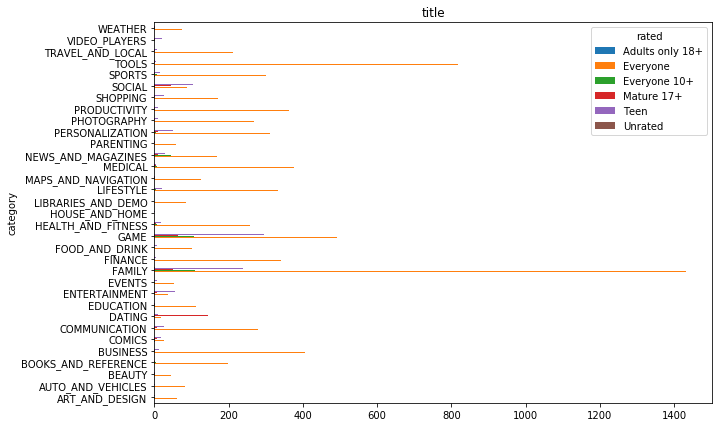

In [9]:
dataset.groupby('rated').category.value_counts().unstack(0).plot.barh(figsize=(10,7), title = 'title')

In [356]:
# a = np.arange(1,6)
# dataset.groupby('category').a.unstack(0).plot.barh(figsize=(10,7), title = 'title')

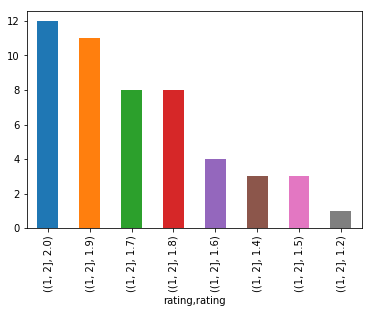

In [10]:
bins = [1,2]
df = dataset.groupby(pd.cut(dataset['rating'], bins=bins)).rating.value_counts()
df.plot(kind='bar')

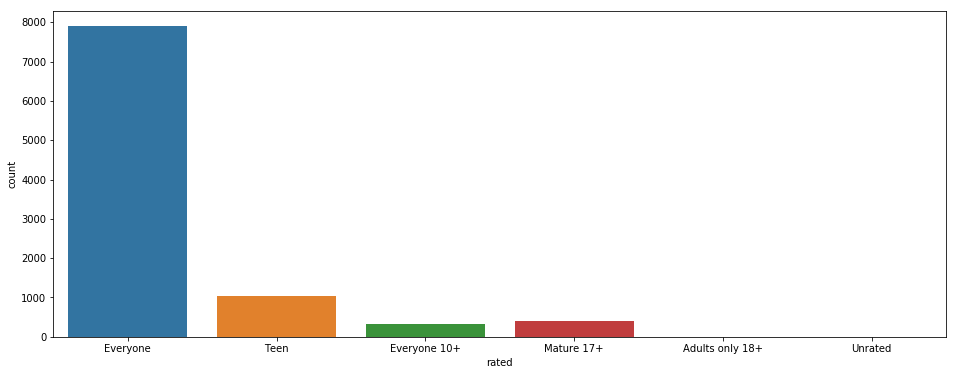

In [11]:
plt.figure(figsize=(16, 6))
sns.countplot(dataset['rated'])

In [12]:
columns = np.array(dataset.columns)
columns

array(['app', 'category', 'rating', 'reviews', 'size', 'installs',
       'price', 'rated', 'lastUpdated', 'osVer'], dtype=object)

In [13]:
installs = dataset.price

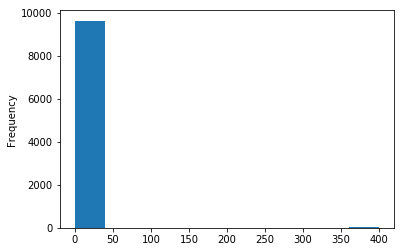

In [14]:
installs.plot(kind='hist')

In [15]:
dataset.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'price',
       'rated', 'lastUpdated', 'osVer'],
      dtype='object')

In [16]:
groupedbydata= dataset.groupby('category')

In [17]:
groupdata_avg = groupedbydata.mean()
groupdata_max = groupedbydata.max()
groupdata_count = groupedbydata.count()
groupdata_count_series = groupdata_count.iloc[:,0]

In [18]:
groupdata_avg

,rating,reviews,installs,price
category,,,,
ART_AND_DESIGN,4.357377,22175.046875,1.786533e+06,0.093281
AUTO_AND_VEHICLES,4.190411,13690.188235,6.250613e+05,0.158471
BEAUTY,4.278571,7476.226415,5.131519e+05,0.000000
BOOKS_AND_REFERENCE,4.344970,75321.234234,7.504367e+06,0.539505
BUSINESS,4.098479,23548.202381,1.659916e+06,0.417357
COMICS,4.181481,41822.696429,8.032348e+05,0.000000
COMMUNICATION,4.121484,907337.676190,3.504215e+07,0.263937
DATING,3.970149,21190.315789,8.241293e+05,0.160468
EDUCATION,4.364407,112303.764706,2.965983e+06,0.150924


In [19]:
groupdata_count_series

category
ART_AND_DESIGN           64
AUTO_AND_VEHICLES        85
BEAUTY                   53
BOOKS_AND_REFERENCE     222
BUSINESS                420
COMICS                   56
COMMUNICATION           315
DATING                  171
EDUCATION               119
ENTERTAINMENT           102
EVENTS                   64
FAMILY                 1832
FINANCE                 345
FOOD_AND_DRINK          112
GAME                    959
HEALTH_AND_FITNESS      288
HOUSE_AND_HOME           74
LIBRARIES_AND_DEMO       84
LIFESTYLE               369
MAPS_AND_NAVIGATION     131
MEDICAL                 395
NEWS_AND_MAGAZINES      254
PARENTING                60
PERSONALIZATION         376
PHOTOGRAPHY             281
PRODUCTIVITY            374
SHOPPING                202
SOCIAL                  239
SPORTS                  325
TOOLS                   827
TRAVEL_AND_LOCAL        219
VIDEO_PLAYERS           163
WEATHER                  79
Name: app, dtype: int64

In [37]:
numApp_rating = pd.DataFrame({
    'rating': groupdata_avg['rating'],
    'app': groupdata_count_series    
})
numApp_rating

,rating,app
category,,
ART_AND_DESIGN,4.357377,64
AUTO_AND_VEHICLES,4.190411,85
BEAUTY,4.278571,53
BOOKS_AND_REFERENCE,4.344970,222
BUSINESS,4.098479,420
COMICS,4.181481,56
COMMUNICATION,4.121484,315
DATING,3.970149,171
EDUCATION,4.364407,119


(array([3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5]),
 <a list of 7 Text xticklabel objects>)

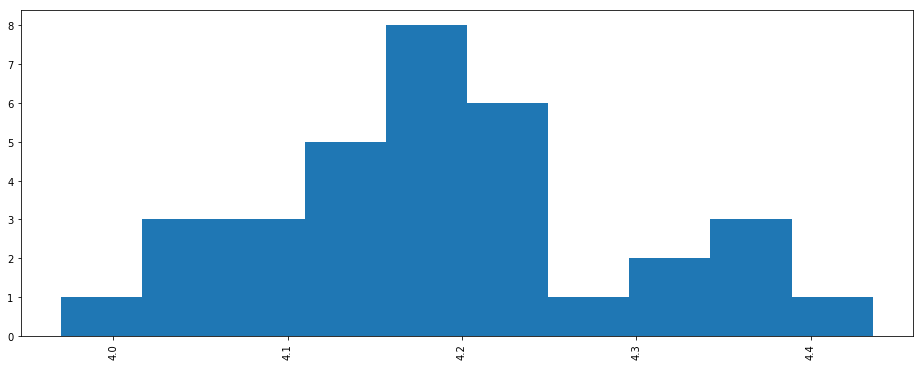

In [40]:
plt.figure(figsize=(16, 6))
plt.hist(numApp_rating['rating'])
plt.xticks(rotation=90)

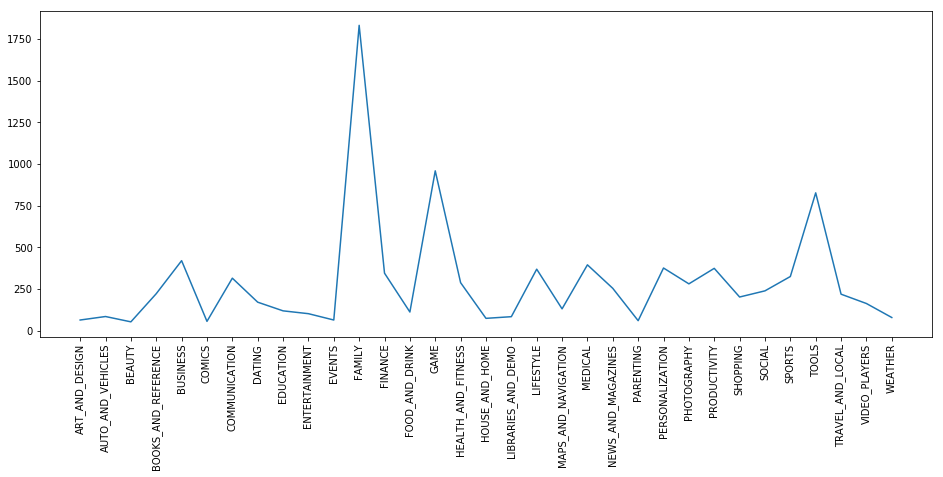

In [43]:
plt.figure(figsize=(16, 6))
plt.plot(groupdata_count_series)
plt.xticks(rotation=90)
plt.show()

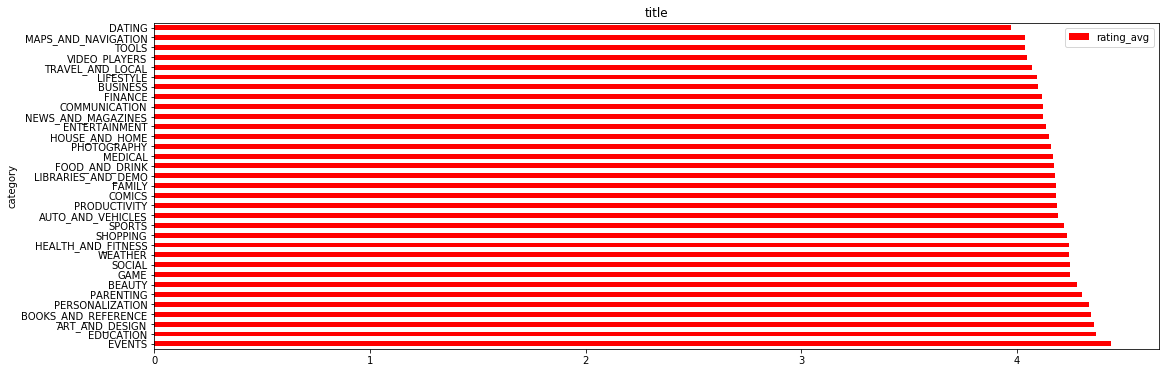

In [64]:
alternative_method = groupdata_avg.merge(groupdata_count, 
                      left_index=True, right_index=True,
                      suffixes=['_avg', '_count'])

#alternative_method[['app', 'rating_avg']].sort_values(by=['app', 'rating_avg'], ascending=True).plot(kind='barh', figsize=(18, 6), title='title')
alternative_method[['rating_avg']].sort_values(by=['rating_avg'], ascending=False).plot(kind='barh', figsize=(18, 6), title='title')

In [63]:
alternative_method

,rating_avg,reviews_avg,installs_avg,price_avg,app,rating_count,reviews_count,size,installs_count,price_count,rated,lastUpdated,osVer
category,,,,,,,,,,,,,
ART_AND_DESIGN,4.357377,22175.046875,1.786533e+06,0.093281,64,61,64,64,64,64,64,64,64
AUTO_AND_VEHICLES,4.190411,13690.188235,6.250613e+05,0.158471,85,73,85,85,85,85,85,85,85
BEAUTY,4.278571,7476.226415,5.131519e+05,0.000000,53,42,53,53,53,53,53,53,53
BOOKS_AND_REFERENCE,4.344970,75321.234234,7.504367e+06,0.539505,222,169,222,222,222,222,222,222,222
BUSINESS,4.098479,23548.202381,1.659916e+06,0.417357,420,263,420,420,420,420,420,420,420
COMICS,4.181481,41822.696429,8.032348e+05,0.000000,56,54,56,56,56,56,56,56,56
COMMUNICATION,4.121484,907337.676190,3.504215e+07,0.263937,315,256,315,315,315,315,315,315,315
DATING,3.970149,21190.315789,8.241293e+05,0.160468,171,134,171,171,171,171,171,171,171
EDUCATION,4.364407,112303.764706,2.965983e+06,0.150924,119,118,119,119,119,119,119,119,119


In [ ]:
groupdata_max

In [48]:
# max_group = groupdata_.merge(groupdata_count, 
#                       left_index=True, right_index=True,
#                       suffixes=['_avg', '_count'])

# alternative_method[['app', 'rating_avg']].sort_values(by=['app', 'rating_avg'], ascending=True).plot(kind='barh', figsize=(18, 6), title='title')


In [49]:
dataset.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'price',
       'rated', 'lastUpdated', 'osVer'],
      dtype='object')

In [50]:
from cycler import cycler

In [96]:
plt.rc('axes', prop_cycle=(cycler('color', sns.color_palette("hls", 33))))

In [91]:
gdf = dataset.groupby(["category"])['rating']

AttributeError: 'Series' object has no attribute 'titile'

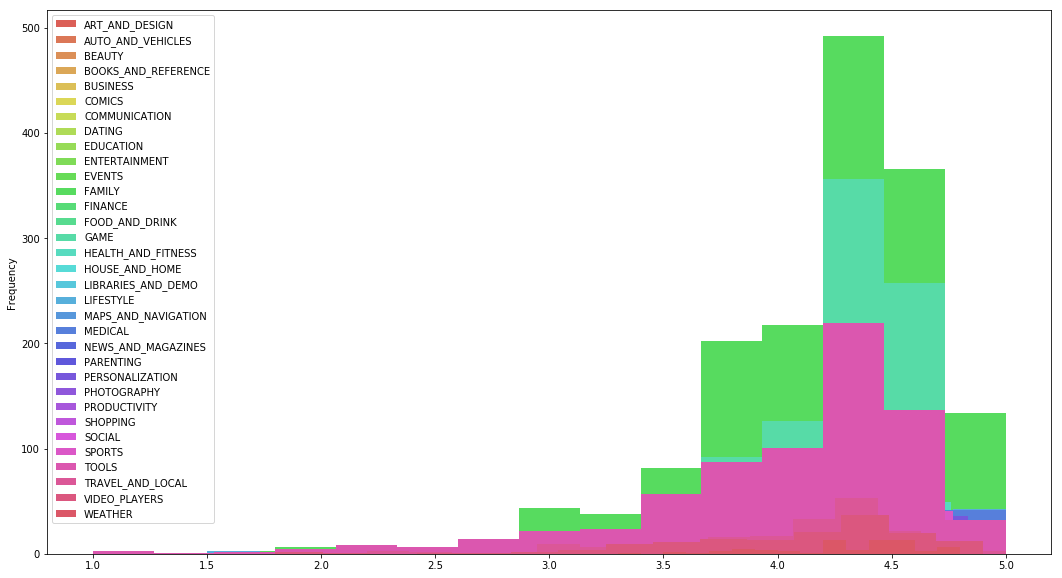

In [99]:
ax = gdf.plot(kind='hist', legend = True, bins =15, figsize=(18, 10))
ax.titile('Title')

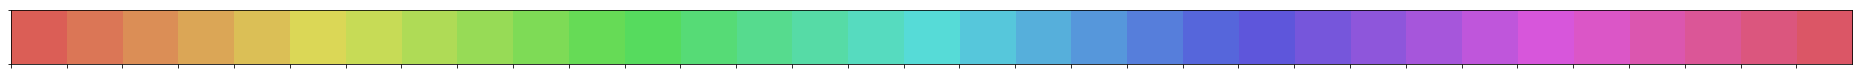

In [95]:
sns.palplot(sns.color_palette("hls", 33))